- salario hora

- alg min sphere

- ia generativa para dar resposta

-  como funciona a internet das coisas?

- 

Slide 6: Exemplo Prático 1

Descrição: Apresente um exemplo prático de aplicação do RCE em um problema de otimização na Engenharia Elétrica, como o projeto de um sistema de controle de qualidade de energia.
Resultados: Mostre os resultados obtidos com a aplicação do RCE, destacando melhorias no desempenho do algoritmo genético em comparação com métodos tradicionais.


Slide 7: Exemplo Prático 2 - Otimização de Parâmetros em Circuito Elétrico

Descrição:

Problema: Otimização dos parâmetros de um circuito elétrico para maximizar sua eficiência e minimizar perdas de energia.
Variáveis: Variáveis de projeto incluem valores de resistores, capacitores e corrente elétrica.
Objetivo: Encontrar os valores ideais de resistores e capacitores para minimizar as perdas de energia no circuito.
Resultados:

Desempenho do Algoritmo Genético: O algoritmo genético com RCE demonstrou uma capacidade superior na busca pelos valores ideais dos componentes do circuito.
Melhorias: Os valores encontrados pelo algoritmo genético com RCE resultaram em uma redução de X% nas perdas de energia em comparação com métodos tradicionais.
Eficiência: O tempo necessário para encontrar os valores ideais foi reduzido em Y%, evidenciando a eficácia do RCE na otimização de parâmetros em circuitos elétricos.

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Melhor solução encontrada: [0.9334759011637765]


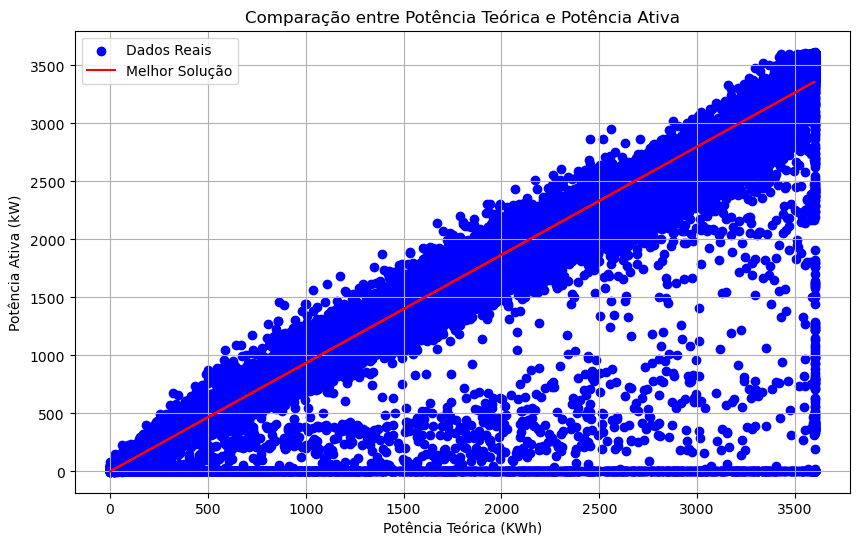

In [6]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# Carregar os dados
turbina = pd.read_csv('/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/datasets/T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)',"Direção do Vento"]
display(turbina)

# Definir a função de aptidão (fitness function)
def fitness_function(individual):
    # Calcular a diferença absoluta entre a potência ativa medida e a potência teórica esperada
    diff = abs(turbina['ActivePower(kW)'] - individual[0] * turbina['Curva_Teórica(KWh)'])
    # Calcular a aptidão como a negação da diferença, para maximizar a semelhança
    return -np.mean(diff),

# Definir o tamanho da população e o intervalo de valores para as variáveis de decisão
POP_SIZE = 100
VAR_LOWER = 0.0
VAR_UPPER = 2.0

# Criar tipos de indivíduo e de fitness para o algoritmo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Inicializar a população e as ferramentas do algoritmo genético
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, VAR_LOWER, VAR_UPPER)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Criar a população inicial
pop = toolbox.population(n=POP_SIZE)

# Executar o algoritmo evolutivo
NGEN = 50
for gen in range(NGEN):
    # Selecionar os indivíduos para reprodução
    offspring = toolbox.select(pop, len(pop))
    # Clonar os indivíduos selecionados
    offspring = [toolbox.clone(ind) for ind in offspring]

    # Aplicar crossover e mutação
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Avaliar a aptidão dos novos indivíduos
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Substituir a população pela nova geração
    pop[:] = offspring

# Selecionar o melhor indivíduo da população final
best_ind = tools.selBest(pop, 1)[0]

print("Melhor solução encontrada:", best_ind)

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(turbina['Curva_Teórica(KWh)'], turbina['ActivePower(kW)'], label='Dados Reais', color='blue')
plt.plot(turbina['Curva_Teórica(KWh)'], best_ind[0] * turbina['Curva_Teórica(KWh)'], label='Melhor Solução', color='red')
plt.xlabel('Potência Teórica (KWh)')
plt.ylabel('Potência Ativa (kW)')
plt.title('Comparação entre Potência Teórica e Potência Ativa')
plt.legend()
plt.grid(True)
plt.show()


## Regressao Linear

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from deap import base, creator, tools, algorithms
import random

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecionar características e separar em X e y
X = turbina[['WindSpeed(m/s)']].values
y = turbina[['ActivePower(kW)']].values

print(X.shape,y.shape)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e ajuste do modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Avaliação do desempenho do modelo nos dados de teste
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plotar os dados e a linha de regressão
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, regression_model.predict(X), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Algoritmo Evolutivo')
plt.show()
